<a href="https://colab.research.google.com/github/grnascimento/IA025/blob/main/pr%C3%A9_processamento_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pré-Processamento: Outliers**

##Os outiliers são: a) valores acima do limite superior de um boxplot ou abaixo do limite mínimo de um boxplot; b) valores 3 desvios-padrão acima ou abaixo da média em uma gaussiana; c) valores distantes de uma distribuição média em um scatterplot; de forma que a existência destes dados discrepantes podem vir a enviesar bastante o comportamento e resultados obtidos numa pesquisa envolvendo estes dados.

##Existem duas possibilidades com relação aos outliers:

##**1 - Eles não são o objeto de estudo:** tomando um exemplo de uma pessoa adulta com uma altura de 30cm ou 2.50m, se o estudo for realizado para a normalidade, podemos desconsiderar estes outiliers, de forma a evitar o enviesamento dos dados;

##**2 - Eles são o objeto de estudo:** tomando ainda o exemplo de uma pessoa adulta com uma altura de 30cm ou 2.50m, se o estudo for realizado levando em consideração nanismo e gigantismo, há a necessidade de métodos robustos de processamento, já que estas metodologias são mais adequadas para evitar o enviesamento;

##**Cuidados gerais com os outliers:** 
 

*   ## No geral, o melhor método para verificar a existência de outliers é o uso de boxplot e a retirada dos mesmos se darão considerando os limites inferior e superior do boxplot, uma vez que estatisticamente é o modelo mais difundido e que segue a metodologia robusta;
*   ## Antes de pensar na retirada dos outiliers é preciso verificar a possibilidade de erros sistemáticos no preenchimento do banco de dados, tais como erros de digitação, erro de medição, precisão de equipamentos, etc, já que estes erros podem ser propagados nas demais medidas;
*   ## Só é possível a retirada de outliers se eles corresponderem a uma quantidade pouco significativa de amostras, em geral, menor que 10% do valor da amostra, caso contrário o enviesamento será significativo;
*   ## Uma vez que tomou-se a decisão de retirar os outliers, não é possível fazer novos boxplots, pois a metodologia estatística do boxplot levará a aparecer novos outliers, o que levará o desenvolvedor ao engano caso tente retirar novamente os outliers;
*   ## Se os outliers forem importantes ou seja feita a opção por mantê-los ao invés de retirá-los, é importante saber que as metodologias normais resultarão em enviesamento, de forma que só será possível o uso de metodologias robustas.



#**Visualização de outliers**

##**No Boxplot**

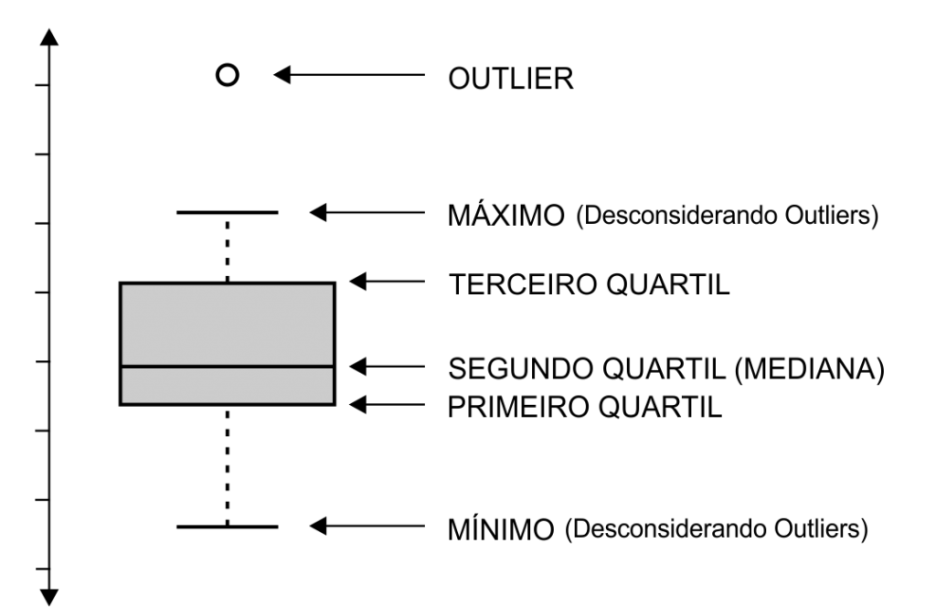

##**Na gaussiana**

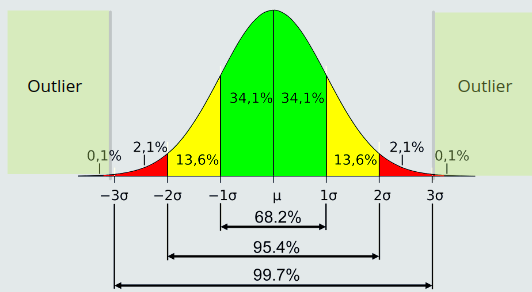

##**No scatterplot: fora de um cluster**

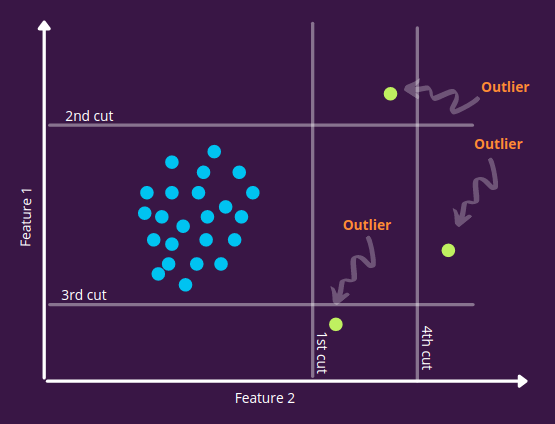

##**No scatterplot: fora de uma regressão**

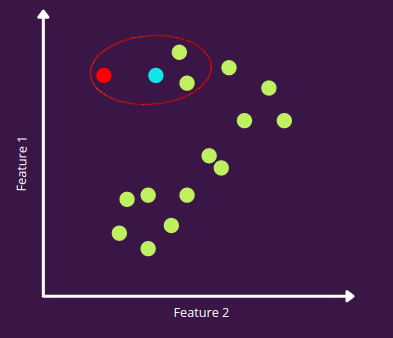

#Instalação das bibliotecas e pacotes necessários

In [ ]:
!pip install xlrd==2.0.1

     |████████████████████████████████| 96 kB 5.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
%matplotlib inline
%load_ext google.colab.data_table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib as mpl
from matplotlib import rc
import xlrd

#Clonando o Github para obtenção dos dados

In [ ]:
!git clone https://github.com/grnascimento/IC

Cloning into 'IC'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


#Criando e visualizando o dataframe

In [ ]:
df = pd.read_excel('/content/IC/Reunioes/pima.xls')

In [ ]:
df

,v1,v2,v3,v4,v5,v6,v7,v8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


#Ajustes dos parâmetros de gráfico pelo Seaborn

In [ ]:
mpl.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.family'] = 'Roboto'
sns.set(font='Roboto',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'xtick.bottom': False,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
 
sns.set_context("notebook", rc={"font.size":20,
                                "axes.titlesize":24,
                                "axes.labelsize":18})

#Visualizando os Boxplots das Variáveis

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


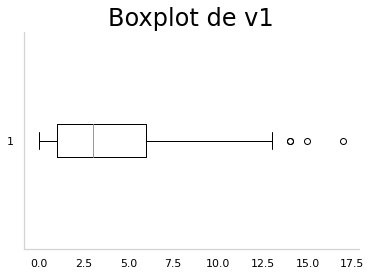

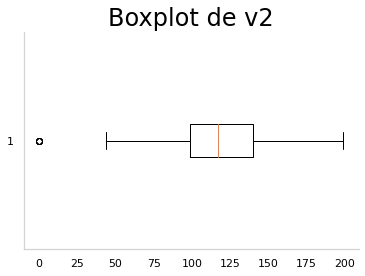

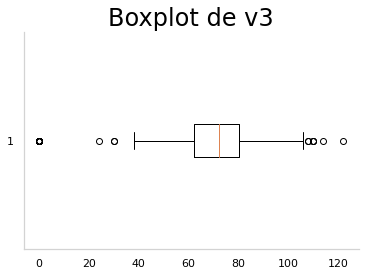

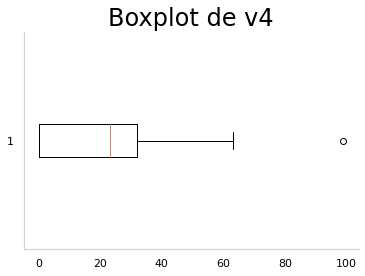

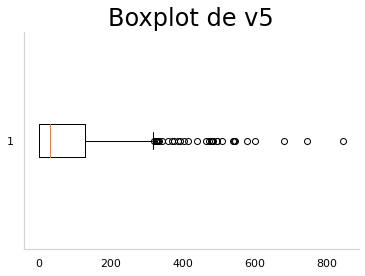

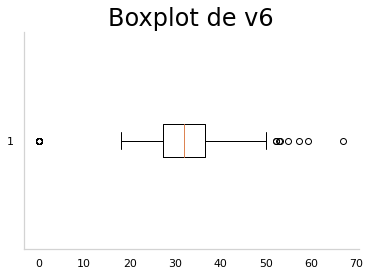

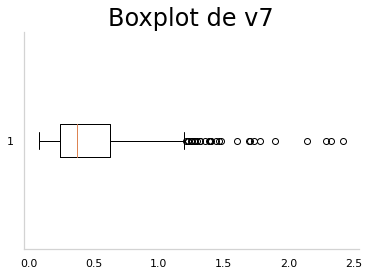

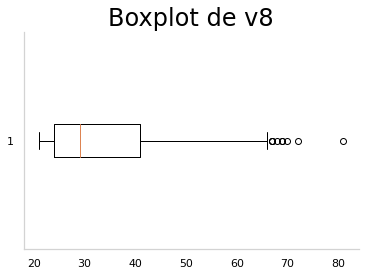

In [ ]:
for col in df.columns:
  plt.boxplot(x=df[col],vert=False)
  plt.title('Boxplot de ' + col)
  plt.show()
  print('\n')

#Verificando os dados estatísticos das variáveis

In [ ]:
df.describe()

,v1,v2,v3,v4,v5,v6,v7,v8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#**1º Caso: Retirada de Outliers**

##**Método 1: usando os limites inferior e superior do Boxplot**

##Encontrando os valores estatísiticos da Boxplot correspondente a cada variável e retirando os valores acima do limite superior e abaixo do limite inferior

In [ ]:
df1 = df.copy()
for col in df1.columns:
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  Lower_Fence = Q1 - (1.5 * IQR)
  Upper_Fence = Q3 + (1.5 * IQR)
  df1 = df1.drop(df1[(df1[col] <= Lower_Fence)].index)
  df1 = df1.drop(df1[(df1[col] >= Upper_Fence)].index)   

##Verificando os dados estatísticos das variáveis após a retirada dos outliers

In [ ]:
df1.describe()

,v1,v2,v3,v4,v5,v6,v7,v8
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.836478,72.014151,20.778302,68.844340,31.994969,0.425346,32.567610
std,3.251388,28.981205,11.310010,15.274483,83.173773,6.422311,0.244421,10.873365
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.359500,29.000000
75%,6.000000,136.000000,80.000000,32.000000,122.000000,36.025000,0.583000,40.000000
max,13.000000,198.000000,106.000000,60.000000,328.000000,49.700000,1.162000,65.000000


##**Cuidado: não faça novos boxplots após a retirada dos outliers**

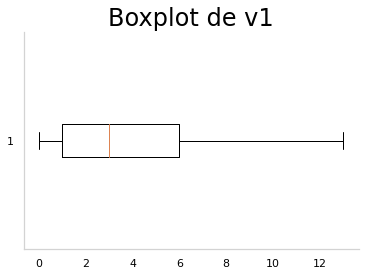

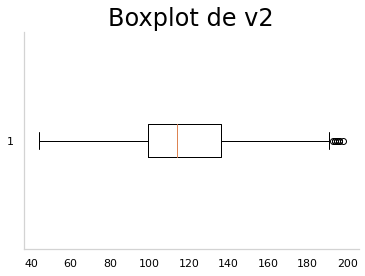

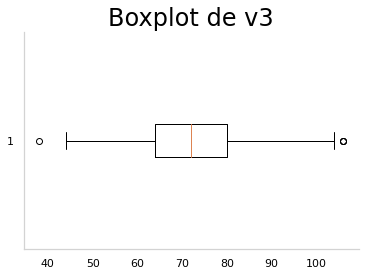

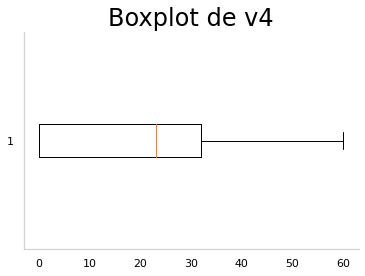

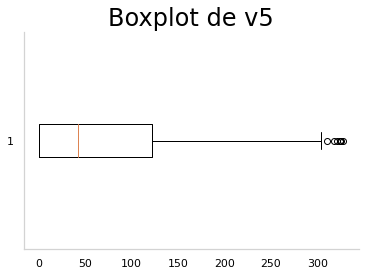

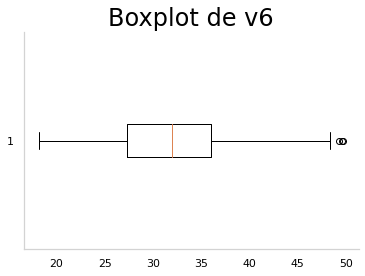

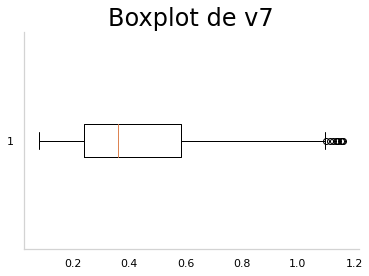

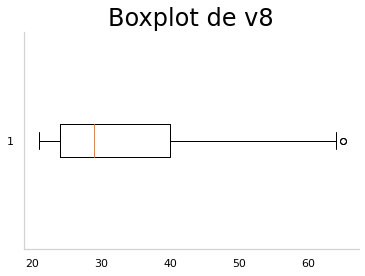

In [ ]:
for col in df1.columns:
  plt.boxplot(x=df1[col],vert=False)
  plt.title('Boxplot de ' + col)
  plt.show()
  print('\n')

##**Método 2: usando a biblioteca [PyOD](https://pyod.readthedocs.io/en/latest/)**

##Instalando e chamando a biblioteca.

In [ ]:
!pip install pyod

     |████████████████████████████████| 114 kB 23.4 MB/s 
  Created wheel for pyod: filename=pyod-0.9.8-py3-none-any.whl size=136775 sha256=7fd3833e3568d2939808e1f20b3623568f9492298d1780bca2e2c587326d990e
  Stored in directory: /root/.cache/pip/wheels/ba/8f/95/6cb376aec9fae09d9b1622d1662c902b522deb353cb80836a6
Successfully built pyod


In [ ]:
from pyod.models.knn import KNN

In [ ]:
df2 = df.copy()

##Aplicado a metodologia KNN para encontrar o index dos outliers.

In [ ]:
detector = KNN().fit(df2)

In [ ]:
previsoes = detector.labels_
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
outliers = []
for i in range (len(previsoes)):
  if previsoes[i] == 1:
    outliers.append(i)

##Deletando os outliers e verificando os dados estatísticos.

In [ ]:
df2 = df2.drop(df2.iloc[outliers,:].index)
df2.describe()

,v1,v2,v3,v4,v5,v6,v7,v8
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,3.853835,118.652677,68.904486,19.399421,58.781476,31.572793,0.458368,32.817656
std,3.347557,28.565882,18.786663,15.607494,75.501243,7.618339,0.313813,11.201515
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238500,24.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,31.900000,0.362000,29.000000
75%,6.000000,136.000000,80.000000,32.000000,110.000000,35.900000,0.600500,40.000000
max,17.000000,199.000000,114.000000,60.000000,342.000000,52.900000,2.288000,70.000000


##Vantagens e desvantagens dos métodos:

##**Boxplot:** a vantagem é que os métodos robustos usam os quartis, de forma que estatisticamente é mais interessante por ser mais difundido; a desvantagem é que não considera outliers por metodologias específicas e isto pode mascarar outiliers dependendo do tipo de pesquisa que está sendo realizada;

##**PyOD:** a vantagem é que há uma variabilidade de métodos para serem considerados e isto pode facilitar para pesquisas específicas, a desvantagem é que existe alguma complexidade na escolha do método mais adequado, sendo extremamente importante conhecer os dados e o modelo que será aplicado a estes dados.


##**2º Caso: usando métodos robustos e mantendo os outliers**

##A documentação que explica o pré-processamento robusto, encontra-se em: [Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
transformer = RobustScaler().fit(df)

In [ ]:
dft = pd.DataFrame(transformer.transform(df))
dft

,0,1,2,3,4,5,6,7
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294
...,...,...,...,...,...,...,...,...
763,1.4,-0.387879,0.222222,0.78125,1.174853,0.096774,-0.526797,2.000000
764,-0.2,0.121212,-0.111111,0.12500,-0.239686,0.516129,-0.084967,-0.117647
765,0.4,0.096970,0.000000,0.00000,0.640472,-0.623656,-0.333333,0.058824
766,-0.4,0.218182,-0.666667,-0.71875,-0.239686,-0.204301,-0.061438,1.058824


##Depois de fazer o Robust Scaler nas variáveis que possuem outliers, é necessário utilizar metodologias de machine learning robustas:

##**Para parâmetros pequenos:** Huber Classifier, Huber Regressor e Huber Clustering;
##**Para parâmetros grandes:** MOM Classifier, MOM Regressor e MOM Clustering.

##Isso está documentado em [Metodologias Robustas](https://scikit-learn-extra.readthedocs.io/en/stable/modules/robust.html).

##No caso do uso de Deep Learning, não é necessária arquitetura específica, mas é indicado o Robust Scaler para melhor desempenho.